In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("50_Startups .csv")
df.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


### Estimate profit based on RND budget

### Perform scatterplot on Profit VS RND

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

AttributeError: PathCollection.set() got an unexpected keyword argument 'X'

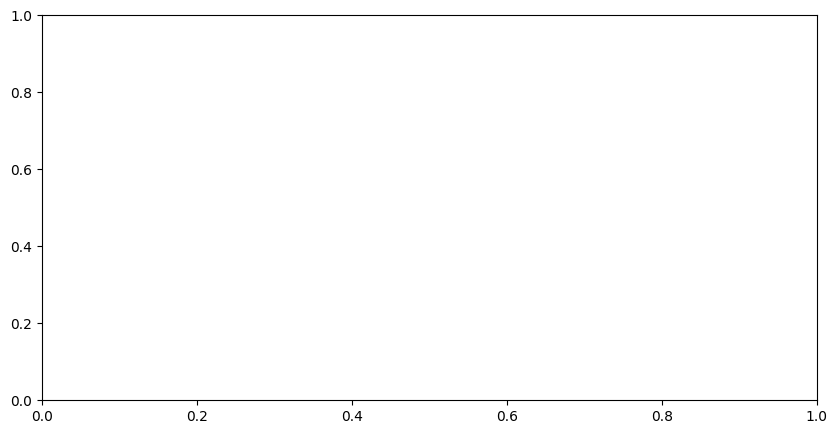

In [12]:
plt.figure( figsize=(10, 5))
sns.scatterplot(data=df, X="RND", Y="PROFIT")
plt.title("PROFIT VS RND")
plt.show()

In [14]:
X = df[["RND"]]
X.head()

,RND
0,165349.20
1,162597.70
2,153441.51
3,144372.41
4,142107.34


In [15]:
Y = df[["PROFIT"]]
Y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


In [16]:
X.values[0:5]

array([[165349.2 ],
       [162597.7 ],
       [153441.51],
       [144372.41],
       [142107.34]])

### create a linear regression model

In [17]:
from sklearn.linear_model import LinearRegression

In [19]:
model = LinearRegression()
model.fit(X,Y)

LinearRegression()

### Get the slope and intercept

In [20]:
slope = model.coef_
intercept = model.intercept_
print(f"Slope : {slope}, Intercept : {intercept}")

Slope : [[0.85429137]], Intercept : [49032.89914125]


### Profit(est)= 49032.9 + 0.8543*RND

### Out of sample prediction

#### Estimate the profit for startup with RND spend of 100000

In [21]:
rnd = 1_60_000
profit_pred = model.predict([[rnd]])
print(f"Predicted profit : {profit_pred}")

Predicted profit : [[185719.51849146]]


### Plot regression plot

In [23]:
plt.figure(figsize=(10,5))
sns.regplot(data=df,X="RND",Y="Profit",line_kws= {"color" : "red"})
plt.title("Regression PLot PROFIT VS RND")
plt.grid()
plt.show()                                   

TypeError: regplot() got an unexpected keyword argument 'X'

<Figure size 1000x500 with 0 Axes>

### Model evalution


In [26]:
ypred = model.predict(X)
ypred[0:5]

array([[190289.29389289],
       [187938.71118575],
       [180116.65707807],
       [172369.00320589],
       [170433.97345032]])

In [27]:
Y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


In [31]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y,ypred)
rmse =mse**(1/2)
print(f"Mean Squared Error : {mse:.2f}")
print(f"Root Mean Squared Error : {rmse :.2f}")

Mean Squared Error : 85120931.33
Root Mean Squared Error : 9226.10


In [35]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
mae = mean_absolute_error(Y, ypred)
mape = mean_absolute_percentage_error(Y, ypred)
print(f"Mean Absolute Error : {mae :.2f}")
print(f"Mean Absolute Percentage Error : {mape :.2f}")

Mean Absolute Error : 6910.98
Mean Absolute Percentage Error : 0.11


In [36]:
from sklearn.metrics import r2_score
r2 = r2_score(Y,ypred)
print(f"R2 Score : {r2 :.2f}")

R2 Score : 0.95


### R2 Score > 0.80 is considered to be good

In [37]:
rnd = 80_000
profit_est = model.predict([[rnd]])
print(f"For given RND Budget : {rnd:.2f},Estimited Profit is :{profit_est}")

For given RND Budget : 80000.00,Estimited Profit is :[[117376.20881636]]
